In [ ]:
####################################################################################
#      xxxxxxx - Khalil Zarifsadr / last update: xxxxxxxx                          #
#      Model B: Drilling optimization with MSE and Parameters Recommender System   #
#                                                                                  #
####################################################################################

# importing requird libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
# making numpy printouts easier to read
np.set_printoptions(precision=3, suppress=True)
# printoptions determine the way floating point numbers, arrays, and other Numpy objects are displayed

In [ ]:
####################################################################################
#                                                                                  #
#                                IMPORTING DATA                                    #
#                                                                                  #
####################################################################################

# uploading files from Google Drive to Google Colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls "/content/drive/My Drive/Colab Notebooks/AI PROJECT"
# importing data from google drive
data1 = pd.read_csv("/content/drive/My Drive/Colab Notebooks/AI PROJECT/10795.csv")
data2 = pd.read_csv("/content/drive/My Drive/Colab Notebooks/AI PROJECT/10796.csv")
data3 = pd.read_csv("/content/drive/My Drive/Colab Notebooks/AI PROJECT/10797.csv")
data4 = pd.read_csv("/content/drive/My Drive/Colab Notebooks/AI PROJECT/10798.csv")
data5 = pd.read_csv("/content/drive/My Drive/Colab Notebooks/AI PROJECT/10799.csv")

 10795.csv   10796.csv	 10797.csv   10798.csv	 10799.csv  'xgboost model'


In [ ]:
####################################################################################
#                                                                                  #
#                                 DATA WRANGLING                                   #
#                                                                                  #
####################################################################################

# building a data bank from the available offset data sets at the beggining of each new well
bank = [data1,data2,data3,data5] # wells 1, 2, 3, and 5 are already drilled in the pad
data_bank = pd.concat(bank) #adds rows to the bottom
# selecting feautures to be used in the model
data_bank = data_bank[['Weight on Bit','Top Drive RPM','Top Drive Torque (ft-lbs)','Differential Pressure','Flow In'
             ,'ROP Depth/Hour','Pump Pressure','depth']]
# renaming columns
data_bank.rename(columns={'Weight on Bit':'WOB','Top Drive RPM':'RPM','Top Drive Torque (ft-lbs)':'TORQUE',
                     'Differential Pressure':'DP','ROP Depth/Hour':'ROP',
                     'Pump Pressure':'PUMP P', 'Flow In':'FR','depth':'DEPTH'}, inplace= True)

# setting index on TVD depth for correlatable parameters in the Data Bank (We are assuming that the depth is TVD depth at this point)
data_bank = data_bank.set_index('DEPTH',drop = True, inplace = False)
#data_bank = pd.DataFrame(data_bank)

In [ ]:
# cleaning the data
data_bank.isna().sum()
data_bank = data_bank.dropna()

In [ ]:
####################################################################################
#                                                                                  #
#                             RECOMMENDER SYSTEM                                   #
#                                                                                  #
####################################################################################
depth = data_bank.index[1]

In [ ]:
# function to calculate the lower recommended parameter
def lower(dataBankColumn):
  toReturn = dataBankColumn[n-windowSize]
  for i in range(n-(windowSize-1), n+(windowSize+1)):
    toReturn = toReturn.append(dataBankColumn[i])
  return toReturn.quantile(0.25)

In [ ]:
# function to calculate the higher recommended parameter
def higher(dataBankColumn):
  toReturn = dataBankColumn[n-windowSize]
  for i in range(n-(windowSize-1), n+(windowSize+1)):
    toReturn = toReturn.append(dataBankColumn[i])
  return toReturn.quantile(0.75)

In [ ]:
# defining the smoothing windowSize
windowSize = 30 

In [ ]:
# calculation of the recommended WOB range
WOBL = [0]*(len(data_bank) - depth + 1)
WOBH = [0]*(len(data_bank) - depth + 1)
print(data_bank.keys())
print(data_bank['WOB'])
for n in range(depth,len(data_bank)):
  WOBL[n-depth] = int(lower(data_bank['WOB']))
  WOBH[n-depth] = int(higher(data_bank['WOB']))

Index(['WOB', 'RPM', 'TORQUE', 'DP', 'FR', 'ROP', 'PUMP P'], dtype='object')
DEPTH
1        211.06335
3        212.09865
4        211.27071
7        212.31494
10       212.75661
           ...    
17389     25.62256
17390     24.90550
17391     22.81978
17392     30.74370
17393     38.36837
Name: WOB, Length: 67435, dtype: float64


NameError: ignored

In [ ]:
# calculation of the recommended FLOW RATE range
RPML = [0]*(len(data) - depth + 1)
RPMH = [0]*(len(data) - depth + 1)
for n in range(depth, len(data)):
  RPML[n-depth] = int(lower(data_bank['RPM']))
  RPMH[n-depth] = int(higher(data_bank['RPM']))

In [ ]:
# calculation of the recommended TORQUE range
TORQUEL = [0]*(len(data) - depth + 1)
TORQUEH = [0]*(len(data) - depth + 1)
for n in range(depth, len(data)):
  TORQUEL[n-depth] = int(lower(data_bank['TORQUE']))
  TORQUEH[n-depth] = int(higher(data_bank['TORQUE']))

In [ ]:
# calculation of the recommended DP range
DPL = [0]*(len(data) - depth + 1)
DPH = [0]*(len(data) - depth + 1)
for n in range(depth, len(data)):
  DPL[n-depth] = int(lower(data_bank['DP']))
  DPH[n-depth] = int(higher(data_bank['DP']))

In [ ]:
# calculation of the recommended FR range
FRL = [0]*(len(data) - depth + 1)
FRH = [0]*(len(data) - depth + 1)
for n in range(depth, len(data)):
  FRL[n-depth] = int(lower(data_bank['FR']))
  FRH[n-depth] = int(higher(data_bank['FR']))

In [ ]:
# the optmization data frame
opt = pd.DataFrame(list(zip(WOBL,WOBH,RPML,RPMH,TORQUEL,TORQUEH,DPL,DPH,FRL,FRH)), columns= ['WOBL','WOBH','RPML','RPMH','TORQUEL','TORQUEH','DPL','DPH','FRL','FRH'])

In [ ]:
####################################################################################
#                                                                                  #
#                          SAVING THE DATAFRAME TO CLOUD                           #
#                                                                                  #
####################################################################################

opt.to_pickle("/content/drive/My Drive/Colab Notebooks/AI PROJECT/optimizationDataFolder/opt.pkl")

In [ ]:
#
#
#
#
#
#
####################################################################################
#                                                                                  #
#                       UPLOADING THE DATAFRAME FROM CLOUD                         #
#                                                                                  #
####################################################################################

optimizationDataFrame = pd.read_pickle("/content/drive/My Drive/Colab Notebooks/AI PROJECT/optimizationDataFolder/opt.pkl")

#
#
#
#
#

In [ ]:
####################################################################################
#                                                                                  #
#                        DATA WRANGLING ON THE NEW DATA                            #
#                                                                                  #
####################################################################################

# assuming well4 is a new well
# making a data frame
frames = [data4] #data4 for validation as a future well to be drilled in the same pad
data = pd.concat(frames) 

In [ ]:
# selecting feautures to be used in the model
data = data[['Weight on Bit','Top Drive RPM','Top Drive Torque (ft-lbs)','Differential Pressure','Flow In'
             ,'ROP Depth/Hour','Pump Pressure','depth']]
# renaming columns
data.rename(columns={'Weight on Bit':'WOB','Top Drive RPM':'RPM','Top Drive Torque (ft-lbs)':'TORQUE',
                     'Differential Pressure':'DP','ROP Depth/Hour':'ROP',
                     'Pump Pressure':'PUMP P', 'Flow In':'FR','depth':'DEPTH'}, inplace= True)

In [ ]:
# surface initial depth
depth = data['DEPTH'][1]
# to make a new column for depth
opt['DEPTH'] = list(range(depth-1,len(data)))

In [ ]:
# quick statistics
#data.describe().transpose()

In [ ]:
# removing outliers from data based on statistical analysis
data = data[data['ROP'].between(data['ROP'].quantile(0.001), data['ROP'].quantile(0.999))]
data = data[data['RPM'].between(data['RPM'].quantile(0.001), data['RPM'].quantile(0.999))]
data = data[data['WOB'].between(data['WOB'].quantile(0.001), data['WOB'].quantile(0.999))]
data = data[data['DP'].between(data['DP'].quantile(0.001), data['DP'].quantile(0.999))]
data = data[data['FR'].between(data['FR'].quantile(0.001), data['FR'].quantile(0.999))]
data = data[data['TORQUE'].between(data['TORQUE'].quantile(0.001), data['TORQUE'].quantile(0.999))]

In [ ]:
#data.describe().transpose()

In [ ]:
####################################################################################
#                                                                                  #
#                 MECHANICAL SPECIFIC ENERGY (MSE) CALCULATIONS                    #
#                                                                                  #
####################################################################################

# bit size 
bitsize_sur= 12.25
bitsize_int= 8.75
bitsize_lat= 6.125

In [ ]:
# section information
surface = 2627 #feet
intermediate = 9085 #feet

In [ ]:
# subset of the data based on bit sizes to be used in MSE formula
data_sur= data.loc[(data['DEPTH'] <= surface )]
data_sur= pd.DataFrame(data_sur)

data_int= data.loc[(data['DEPTH'] > surface) & (data['DEPTH'] <= intermediate)]
data_int= pd.DataFrame(data_int)

data_lat= data.loc[(data['DEPTH'] > intermediate)]
data_lat= pd.DataFrame(data_lat)

In [ ]:
# mse formula
data_sur['MSE'] = (((4*data_sur['WOB'])/(math.pi*math.pow(bitsize_sur,2)))
+((480*data_sur['RPM']*data_sur['TORQUE'])/(data_sur['ROP']*(math.pow(bitsize_sur,2)))))/1000

data_int['MSE'] = (((4*data_int['WOB'])/(math.pi*math.pow(bitsize_int,2)))
+((480*data_int['RPM']*data_int['TORQUE'])/(data_int['ROP']*(math.pow(bitsize_int,2)))))/1000

data_lat['MSE'] = (((4*data_lat['WOB'])/(math.pi*math.pow(bitsize_lat,2)))
+((480*data_lat['RPM']*data_lat['TORQUE'])/(data_lat['ROP']*(math.pow(bitsize_lat,2)))))/1000

# to have all MSE calculations in one column
fr = [data_sur,data_int,data_lat]
df = pd.concat(fr)

# setting index on depth
df = df.set_index('DEPTH')

In [ ]:
# drilling is not efficient where ROP is low and MSE is high
# Locate data with high MSE and low ROP in surface, intermediate, and production sections
data_sur_mse= data_sur.loc[(data_sur['MSE'] > data_sur['MSE'].quantile(0.85)) & (data_sur['ROP'] < data_sur['ROP'].quantile(0.15))]
data_int_mse= data_int.loc[(data_int['MSE'] > data_int['MSE'].quantile(0.85)) & (data_int['ROP'] < data_int['ROP'].quantile(0.15))]
data_lat_mse= data_lat.loc[(data_lat['MSE'] > data_lat['MSE'].quantile(0.85)) & (data_lat['ROP'] < data_lat['ROP'].quantile(0.15))]

#data_sur_mse.describe()
#data_int_mse.describe()
#data_lat_mse.describe()

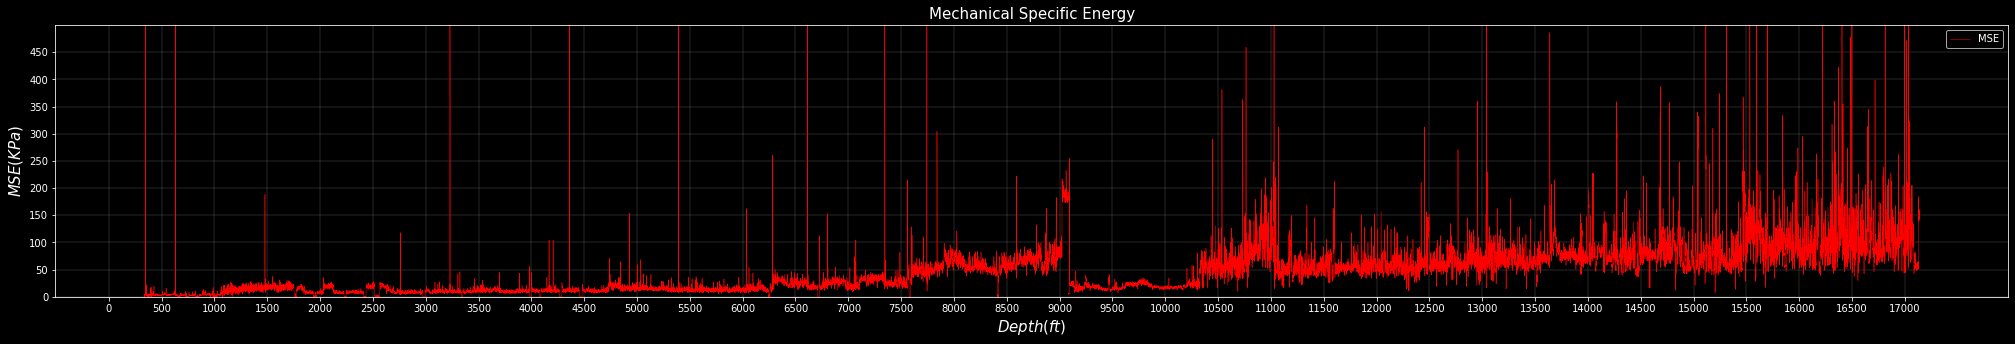

In [ ]:
####################################################################################
#                                                                                  #
#                          VISUALIZATION OF THE MODEL                              #
#                                                                                  #
####################################################################################

# visualization of MS
with plt.style.context(('dark_background')):
  plt.figure(figsize=(35,5))
  plt.plot(df['MSE'] ,linewidth=0.5, color='red', label="MSE")
  plt.legend(loc='best')
  plt.ylim(0,500)
  plt.xticks(np.arange(0, 17500, step=500))
  plt.yticks(np.arange(0, 500, step=50))
  plt.xlabel('$Depth(ft)$',fontsize=15)
  plt.ylabel('$MSE (KPa)$',fontsize=15)
  plt.grid(color='gray',linewidth=0.3)
  plt.title('Mechanical Specific Energy',fontsize=15)
  plt.show()

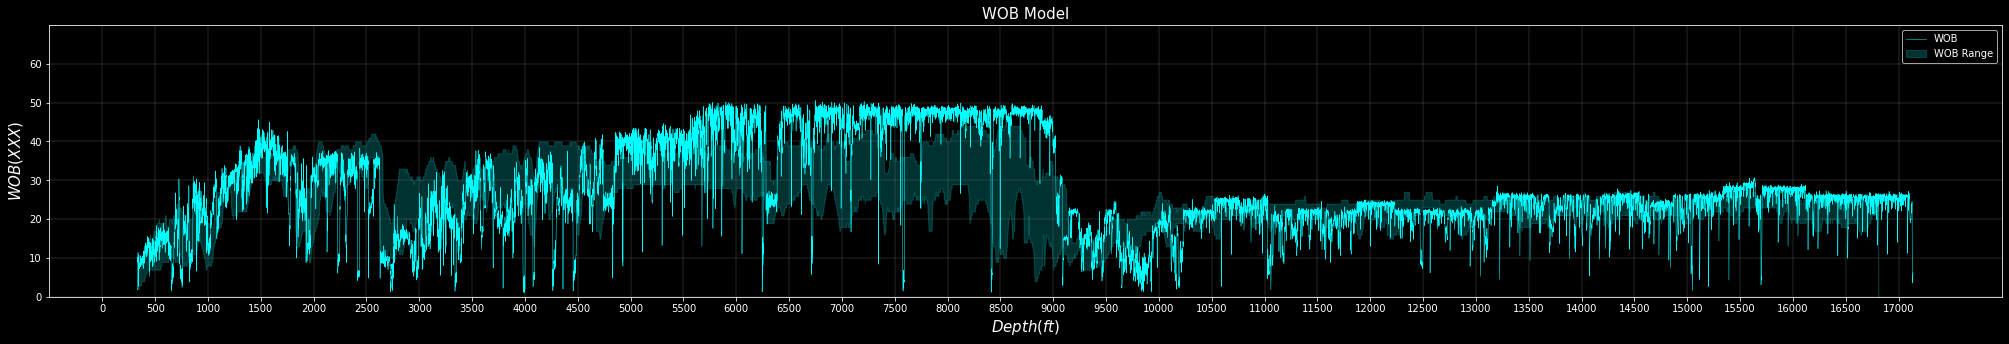

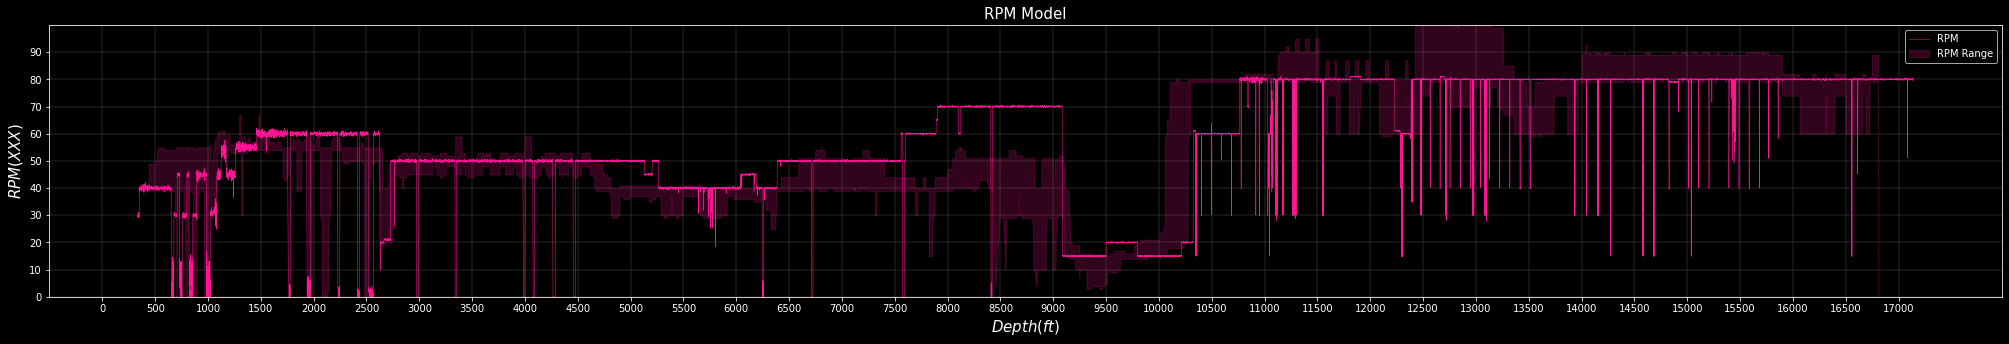

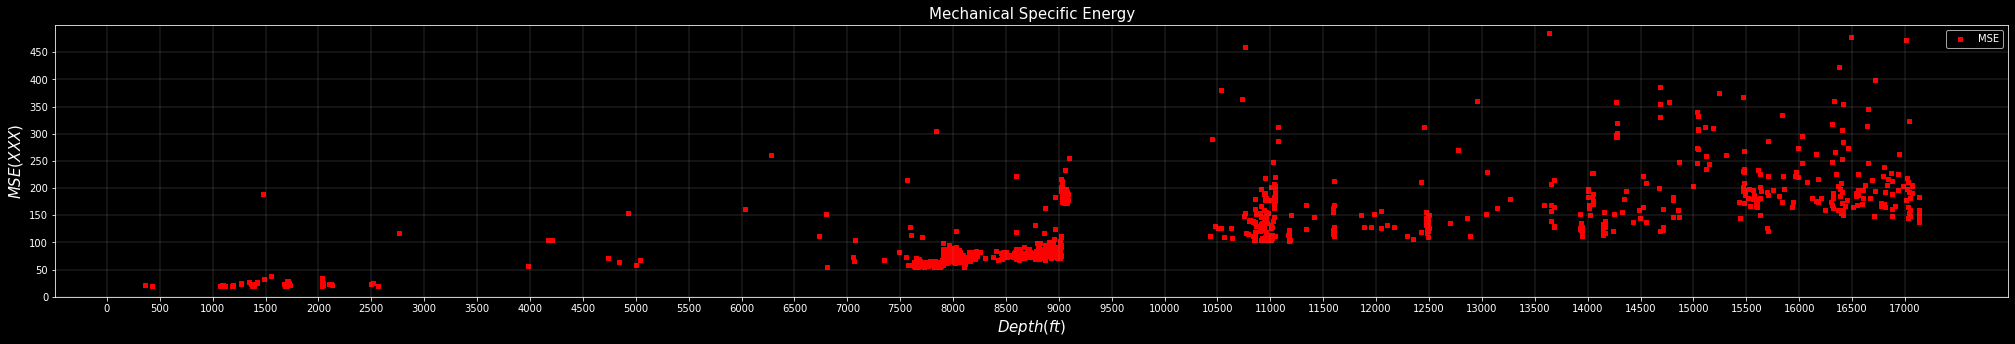

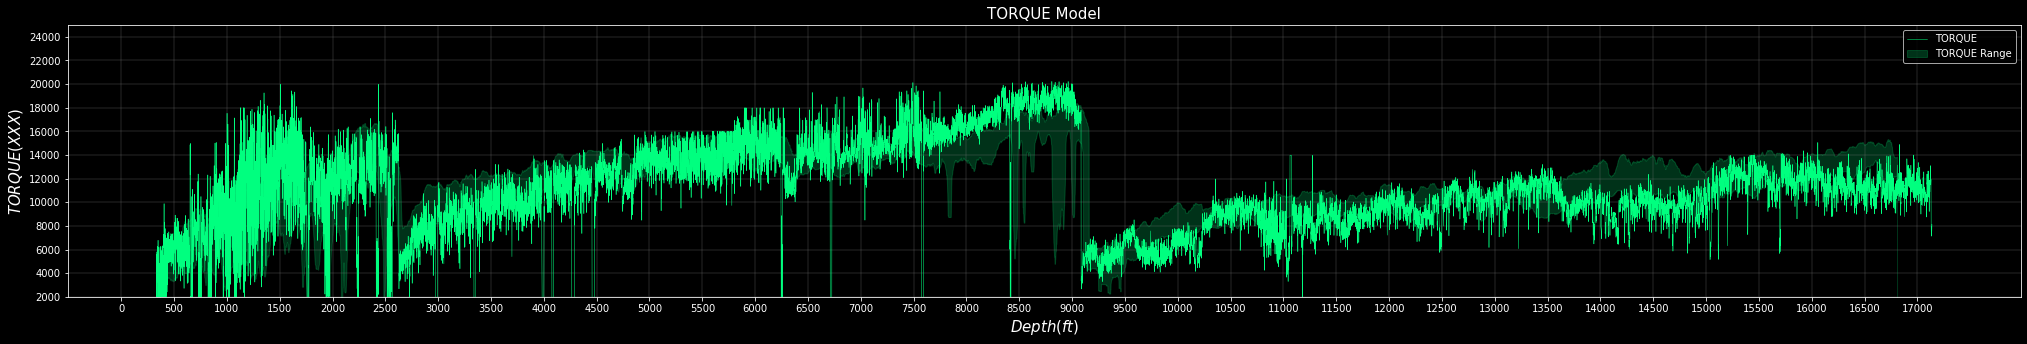

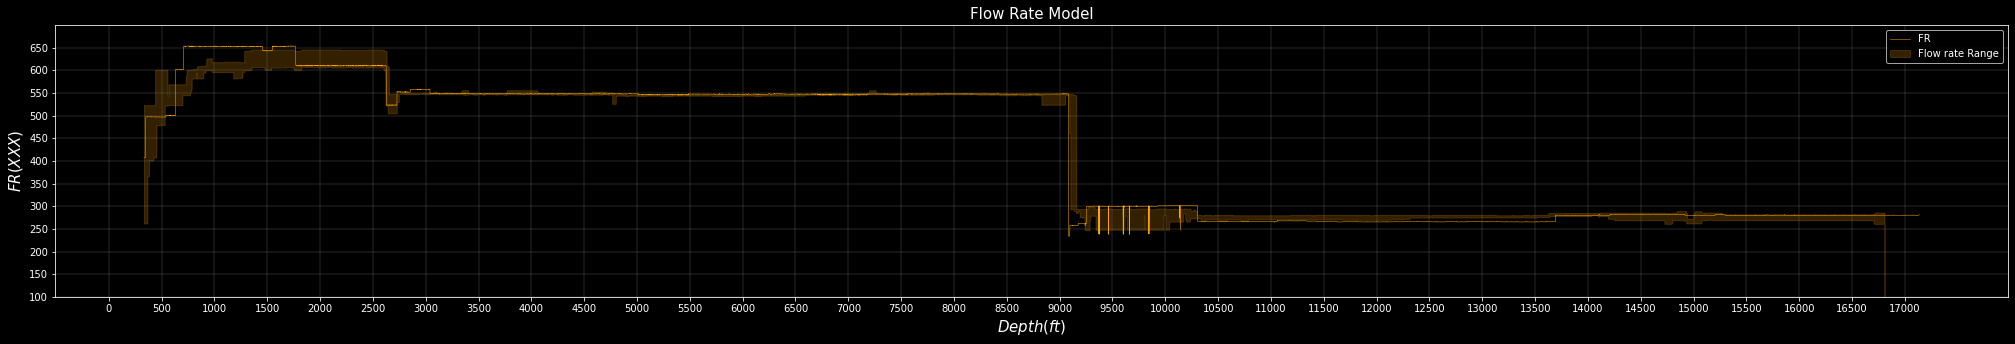

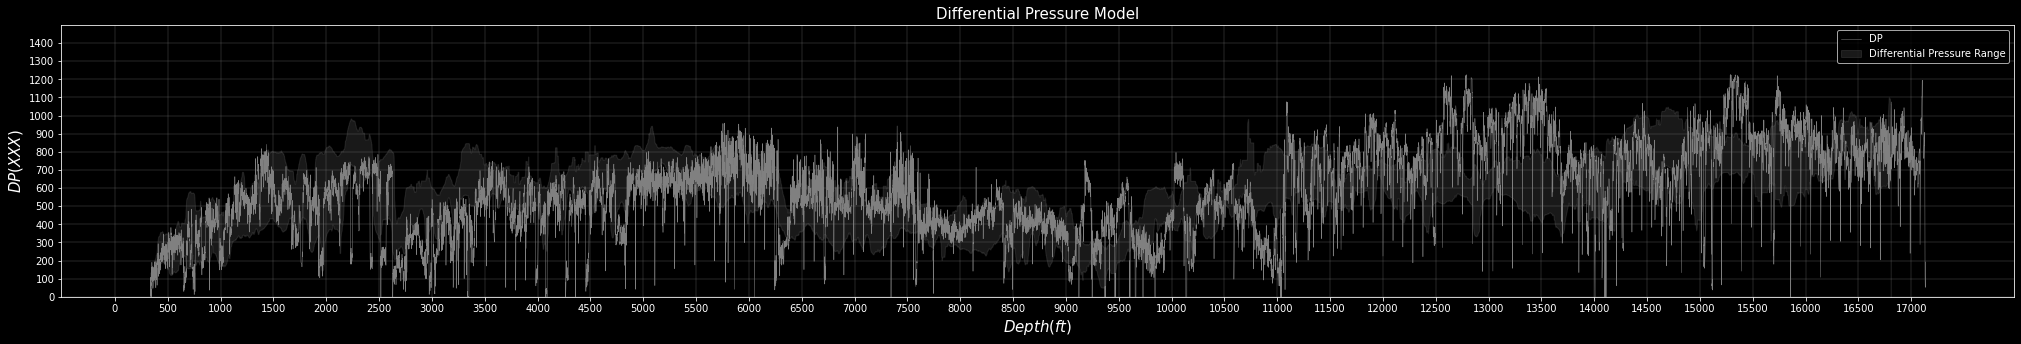

In [ ]:
# visualization of WOB
with plt.style.context(('dark_background')):
  plt.figure(figsize=(35,5))
  plt.plot(data['DEPTH'], data['WOB'] ,linewidth=0.5, color='cyan', label="WOB")
  plt.fill_between(optimizationDataFrame['DEPTH'],optimizationDataFrame['WOBH'],optimizationDataFrame['WOBL'],alpha=0.2,color='cyan',label='WOB Range')
  plt.legend(loc='best')
  plt.ylim(0,70)
  plt.xticks(np.arange(0, 17500, step=500))
  plt.yticks(np.arange(0, 70, step=10))
  plt.xlabel('$Depth(ft)$',fontsize=15)
  plt.ylabel('$WOB (XXX)$',fontsize=15)
  plt.grid(color='gray',linewidth=0.3)
  plt.title('WOB Model',fontsize=15)
  plt.show()

# visualization of RPM
with plt.style.context(('dark_background')):
  plt.figure(figsize=(35,5))
  plt.plot(data['DEPTH'], data['RPM'] ,linewidth=0.5, color='deeppink', label="RPM")
  plt.fill_between(optimizationDataFrame['DEPTH'],optimizationDataFrame['RPMH'],optimizationDataFrame['RPML'],alpha=0.2,color='deeppink',label='RPM Range')
  plt.legend(loc='best')
  plt.ylim(0,100)
  plt.xticks(np.arange(0, 17500, step=500))
  plt.yticks(np.arange(0, 100, step=10))
  plt.xlabel('$Depth(ft)$',fontsize=15)
  plt.ylabel('$RPM (XXX)$',fontsize=15)
  plt.grid(color='gray',linewidth=0.3)
  plt.title('RPM Model',fontsize=15)
  plt.show()

# visualization of MSE
with plt.style.context(('dark_background')):
  plt.figure(figsize=(35,5))
  plt.scatter(data_sur_mse['DEPTH'], data_sur_mse['MSE'] , marker= 's', s = 10, color='red', label="MSE")
  plt.scatter(data_int_mse['DEPTH'], data_int_mse['MSE'] , marker= 's', s = 10, color='red')
  plt.scatter(data_lat_mse['DEPTH'], data_lat_mse['MSE'] , marker= 's', s = 10, color='red')
  plt.legend(loc='best')
  plt.ylim(0,500)
  plt.xticks(np.arange(0, 17500, step=500))
  plt.yticks(np.arange(0, 500, step=50))
  plt.xlabel('$Depth(ft)$',fontsize=15)
  plt.ylabel('$MSE (XXX)$',fontsize=15)
  plt.grid(color='gray',linewidth=0.3)
  plt.title('Mechanical Specific Energy',fontsize=15)
  plt.show()

# visualization of TORQUE
with plt.style.context(('dark_background')):
  plt.figure(figsize=(35,5))
  plt.plot(data['DEPTH'], data['TORQUE'] ,linewidth=0.5, color='springgreen', label="TORQUE")
  plt.fill_between(optimizationDataFrame['DEPTH'],optimizationDataFrame['TORQUEH'],optimizationDataFrame['TORQUEL'],alpha=0.2,color='springgreen',label='TORQUE Range')
  plt.legend(loc='best')
  plt.ylim(2000,25000)
  plt.xticks(np.arange(0, 17500, step=500))
  plt.yticks(np.arange(2000, 25000, step=2000))
  plt.xlabel('$Depth(ft)$',fontsize=15)
  plt.ylabel('$TORQUE (XXX)$',fontsize=15)
  plt.grid(color='gray',linewidth=0.3)
  plt.title('TORQUE Model',fontsize=15)
  plt.show()

# visualization of FR
with plt.style.context(('dark_background')):
  plt.figure(figsize=(35,5))
  plt.plot(data['DEPTH'], data['FR'] ,linewidth=0.5, color='orange', label="FR")
  plt.fill_between(optimizationDataFrame['DEPTH'],optimizationDataFrame['FRH'],optimizationDataFrame['FRL'],alpha=0.2,color='orange',label='Flow rate Range')
  plt.legend(loc='best')
  plt.ylim(100,700)
  plt.xticks(np.arange(0, 17500, step=500))
  plt.yticks(np.arange(100, 700, step=50))
  plt.xlabel('$Depth(ft)$',fontsize=15)
  plt.ylabel('$FR(XXX)$',fontsize=15)
  plt.grid(color='gray',linewidth=0.3)
  plt.title('Flow Rate Model',fontsize=15)
  plt.show()

# visualization of DP
with plt.style.context(('dark_background')):
  plt.figure(figsize=(35,5))
  plt.plot(data['DEPTH'], data['DP'] ,linewidth=0.5, color='gray', label="DP")
  plt.fill_between(optimizationDataFrame['DEPTH'],optimizationDataFrame['DPH'],optimizationDataFrame['DPL'],alpha=0.2,color='gray',label='Differential Pressure Range')
  plt.legend(loc='best')
  plt.ylim(0,1500)
  plt.xticks(np.arange(0, 17500, step=500))
  plt.yticks(np.arange(0, 1500, step=100))
  plt.xlabel('$Depth(ft)$',fontsize=15)
  plt.ylabel('$DP(XXX)$',fontsize=15)
  plt.grid(color='gray',linewidth=0.3)
  plt.title('Differential Pressure Model',fontsize=15)
  plt.show()

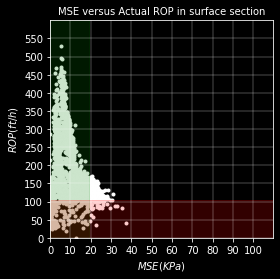

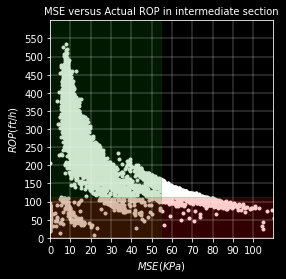

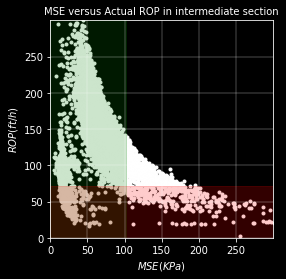

In [ ]:
# visualization of MSE vs ROP in surface section
ropl = data_sur['ROP'].quantile(0.15)
mseh = data_sur['MSE'].quantile(0.85)

with plt.style.context(('dark_background')):
  plt.figure(figsize=(4,4))
  plt.scatter('MSE','ROP',data= data_sur,marker='.',color='w')
  plt.axvspan(xmin=0,xmax=mseh,ymin=0,ymax=1,alpha=0.2,color='g')
  plt.axhspan(ymin=0,ymax=ropl,xmin=0,xmax=1,alpha=0.2,color='r')
  plt.xlim(0,110)
  plt.ylim(0,600)
  plt.xlabel('$MSE(KPa)$',fontsize=10)
  plt.ylabel('$ROP(ft/h)$',fontsize=10)
  plt.xticks(np.arange(0, 110, step=10))
  plt.yticks(np.arange(0, 600, step=50))
  plt.grid(color='w',linewidth=0.3)
  plt.title('MSE versus Actual ROP in surface section',fontsize=10)
plt.show()

# visualization of MSE vs ROP in intermediate section
ropl = data_int['ROP'].quantile(0.15)
mseh = data_int['MSE'].quantile(0.85)

with plt.style.context(('dark_background')):
  plt.figure(figsize=(4,4))
  plt.scatter('MSE','ROP',data= data_int,marker='.',color='w')
  plt.axvspan(xmin=0,xmax=mseh,ymin=0,ymax=1,alpha=0.2,color='g')
  plt.axhspan(ymin=0,ymax=ropl,xmin=0,xmax=1,alpha=0.2,color='r')
  plt.xlim(0,110)
  plt.ylim(0,600)
  plt.xlabel('$MSE(KPa)$',fontsize=10)
  plt.ylabel('$ROP(ft/h)$',fontsize=10)
  plt.xticks(np.arange(0, 110, step=10))
  plt.yticks(np.arange(0, 600, step=50))
  plt.grid(color='w',linewidth=0.3)
  plt.title('MSE versus Actual ROP in intermediate section',fontsize=10)
plt.show()

# visualization of MSE vs ROP in lateral section
ropl = data_lat['ROP'].quantile(0.15)
mseh = data_lat['MSE'].quantile(0.85)

with plt.style.context(('dark_background')):
  plt.figure(figsize=(4,4))
  plt.scatter('MSE','ROP',data= data_lat,marker='.',color='w')
  plt.axvspan(xmin=0,xmax=mseh,ymin=0,ymax=1,alpha=0.2,color='g')
  plt.axhspan(ymin=0,ymax=ropl,xmin=0,xmax=1,alpha=0.2,color='r')
  plt.xlim(0,300)
  plt.ylim(0,300)
  plt.xlabel('$MSE(KPa)$',fontsize=10)
  plt.ylabel('$ROP(ft/h)$',fontsize=10)
  plt.xticks(np.arange(0, 300, step=50))
  plt.yticks(np.arange(0, 300, step=50))
  plt.grid(color='w',linewidth=0.3)
  plt.title('MSE versus Actual ROP in intermediate section',fontsize=10)
plt.show()
